# Feature importance

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel("data_cleaned.xlsx")
data = data.drop('Unnamed: 0', axis=1)
data = data.apply(pd.to_numeric, errors='coerce')

In [25]:
data.rename(columns={'Anksioznost': 'Anxiety', 'Interakcija_kvalitativno': 'Interaction_qualitative','Interakcija_kvantitativno': 'Interaction_quantitative','Introvertiranost': 'Introversion',"Motivacija":"Motivation","Ocena":"Grade","Profesor":"Professor","Razred":"Class","Spol":"Gender","Uspesnost":"Successfulness"}, inplace=True)


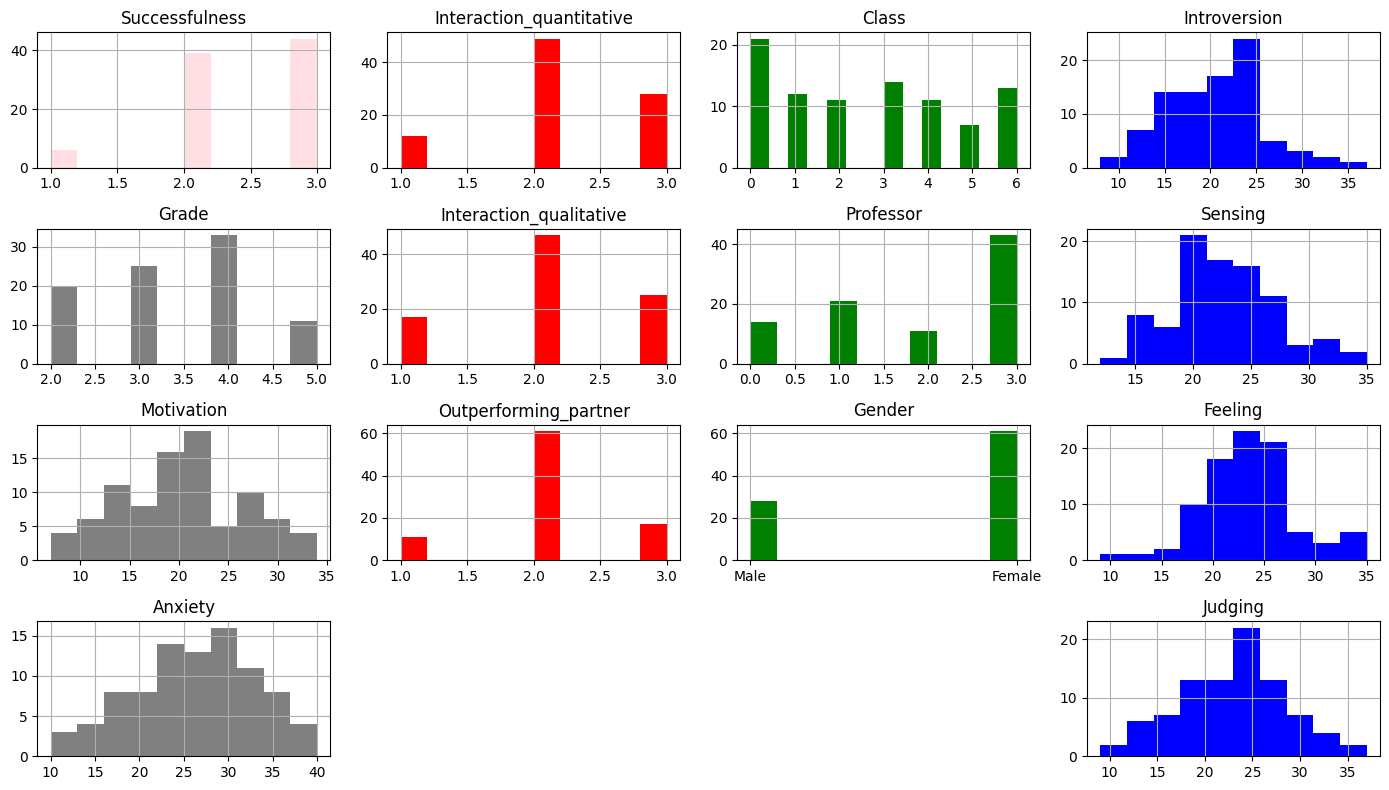

In [26]:
import matplotlib.pyplot as plt

columns_to_plot = data.columns

colors = {
    'Introversion': 'blue',
    'Judging': 'blue',
    'Feeling': 'blue',
    'Sensing': 'blue',
    'Class': 'green',
    'Professor': 'green',
    'Gender': 'green',
    'Interaction_qualitative': 'red',
    'Interaction_quantitative': 'red',
    'Outperforming_partner': 'red'
}

# Custom labels for Gender column
gender_labels = {
    0: 'Male',
    1: 'Female'
}

color_categories = {}
for col in columns_to_plot:
    color = colors.get(col, 'gray')
    if color not in color_categories:
        color_categories[color] = []
    color_categories[color].append(col)

# Ensure Successfulness stays in the original position
if 'Successfulness' in color_categories['gray']:
    color_categories['gray'].remove('Successfulness')
    color_categories['gray'].insert(columns_to_plot.get_loc('Successfulness'), 'Successfulness')

num_categories = len(color_categories)
num_plots = max(len(cols) for cols in color_categories.values())

plt.figure(figsize=(14, 8))

for i, (color, cols) in enumerate(color_categories.items()):
    for j, col in enumerate(cols):
        plt.subplot(num_categories, num_plots, j*num_categories + i + 1)
        if col == 'Successfulness':
            data[col].hist(alpha=0.5, color='pink')  # Change transparency and color for 'Successfulness'
        elif col == 'Gender':
            # Custom tick labels for Gender column
            plt.xticks([0, 1], [gender_labels.get(0, '0'), gender_labels.get(1, '1')])
            data[col].hist(color=color)
        elif col == 'Class':
            # Customizing bins to separate bars in Class column
            data[col].hist(bins=len(data[col].unique()) * 2, color=color)
        else:
            data[col].hist(color=color)
        plt.title(col)

plt.tight_layout()
plt.show()


In [27]:
X = data.drop("Successfulness", axis=1)
y = data["Successfulness"]

In [28]:
X.head()
np.random.seed(1234)

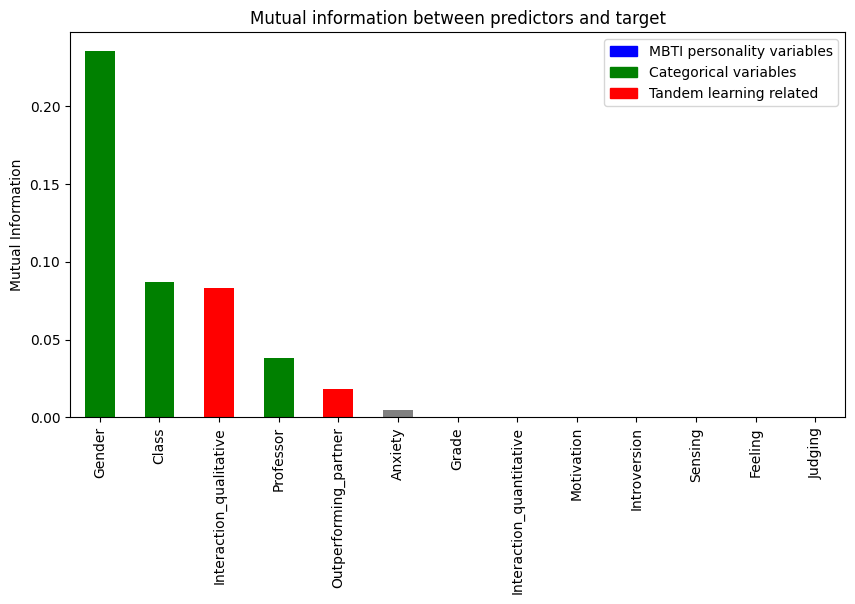

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming X and y are defined

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features=[3, 4, 5])

mi = pd.Series(mi)
mi.index = X.columns
sorted_mi = mi.sort_values(ascending=False)

# Define columns to highlight and their respective colors
highlight_cols1 = ['Introversion', 'Judging', 'Feeling', 'Sensing']
highlight_color1 = 'blue'  # Define color for first group of highlighted columns

highlight_cols2 = ['Class', 'Professor', 'Gender']
highlight_color2 = 'green'  # Define color for second group of highlighted columns

highlight_cols3 = ['Interaction_qualitative', 'Interaction_quantitative', "Outperforming_partner"]
highlight_color3 = 'red'  # Define color for second group of highlighted columns

# Plotting the bar chart with highlighted columns
highlight_colors = {col: highlight_color1 for col in highlight_cols1}
highlight_colors.update({col: highlight_color2 for col in highlight_cols2})
highlight_colors.update({col: highlight_color3 for col in highlight_cols3})

ax = sorted_mi.plot.bar(figsize=(10, 5), color=[highlight_colors.get(col, 'gray') for col in sorted_mi.index])

plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")


legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in [highlight_color1, highlight_color2, highlight_color3]]

legend_labels = [
    'MBTI personality variables',
    'Categorical variables',
    'Tandem learning related',
    'Other Variables'
]

ax.legend(legend_patches, legend_labels)

plt.show()

In [30]:
"""from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y, discrete_features=[3,4,5])

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")"""

'from sklearn.feature_selection import mutual_info_classif\nmi = mutual_info_classif(X, y, discrete_features=[3,4,5])\n\nmi = pd.Series(mi)\nmi.index = X.columns\nmi.sort_values(ascending=False).plot.bar(figsize=(10, 5))\nplt.ylabel(\'Mutual Information\')\nplt.title("Mutual information between predictors and target")'

In [31]:
mi.sort_values(ascending=False)

Gender                      0.235961
Class                       0.087287
Interaction_qualitative     0.083154
Professor                   0.038019
Outperforming_partner       0.018468
Anxiety                     0.004775
Grade                       0.000000
Interaction_quantitative    0.000000
Motivation                  0.000000
Introversion                0.000000
Sensing                     0.000000
Feeling                     0.000000
Judging                     0.000000
dtype: float64

In [32]:
"""#discrete_features = X.dtypes == int
discrete_features =[3,4,5]
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)"""

'#discrete_features = X.dtypes == int\ndiscrete_features =[3,4,5]\nfrom sklearn.feature_selection import mutual_info_regression\n\ndef make_mi_scores(X, y, discrete_features):\n    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)\n    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)\n    mi_scores = mi_scores.sort_values(ascending=False)\n    return mi_scores\n\nmi_scores = make_mi_scores(X, y, discrete_features)\n\ndef plot_mi_scores(scores):\n    scores = scores.sort_values(ascending=True)\n    width = np.arange(len(scores))\n    ticks = list(scores.index)\n    plt.barh(width, scores)\n    plt.yticks(width, ticks)\n    plt.title("Mutual Information Scores")\n\n\nplt.figure(dpi=100, figsize=(8, 5))\nplot_mi_scores(mi_scores)'

# Korelacijska matrika

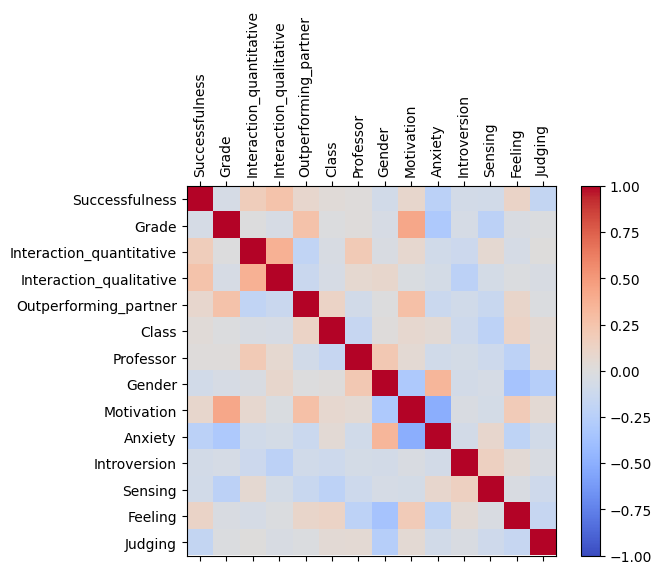

In [33]:
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

RFE 
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # or any model you prefer
import pandas as pd

# Assuming X contains your features (both categorical and continuous)
# and y contains your target variable

model = LogisticRegression()  # Replace this with any model you prefer
num_features_to_select = 3  # Select the number of features you want
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get ranking of features
feature_ranking = rfe.ranking_

# Get selected feature names and their rankings
selected_features = X.columns[selected_indices]  # Assuming X is a pandas DataFrame
selected_features_ranking = {feat: rank for feat, rank in zip(X.columns, feature_ranking)}

# Transform X to include only selected features
X_selected = X.iloc[:, selected_indices]

# Now you can use X_selected for modeling with selected features

# Print selected features and their rankings
print("Selected Features and Their Rankings:")
for feature, rank in selected_features_ranking.items():
    print(f"Feature: {feature}, Rank: {rank}")

c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected Features and Their Rankings:
Feature: Grade, Rank: 4
Feature: Interaction_quantitative, Rank: 2
Feature: Interaction_qualitative, Rank: 1
Feature: Outperforming_partner, Rank: 1
Feature: Class, Rank: 5
Feature: Professor, Rank: 3
Feature: Gender, Rank: 1
Feature: Motivation, Rank: 11
Feature: Anxiety, Rank: 8
Feature: Introversion, Rank: 10
Feature: Sensing, Rank: 6
Feature: Feeling, Rank: 7
Feature: Judging, Rank: 9


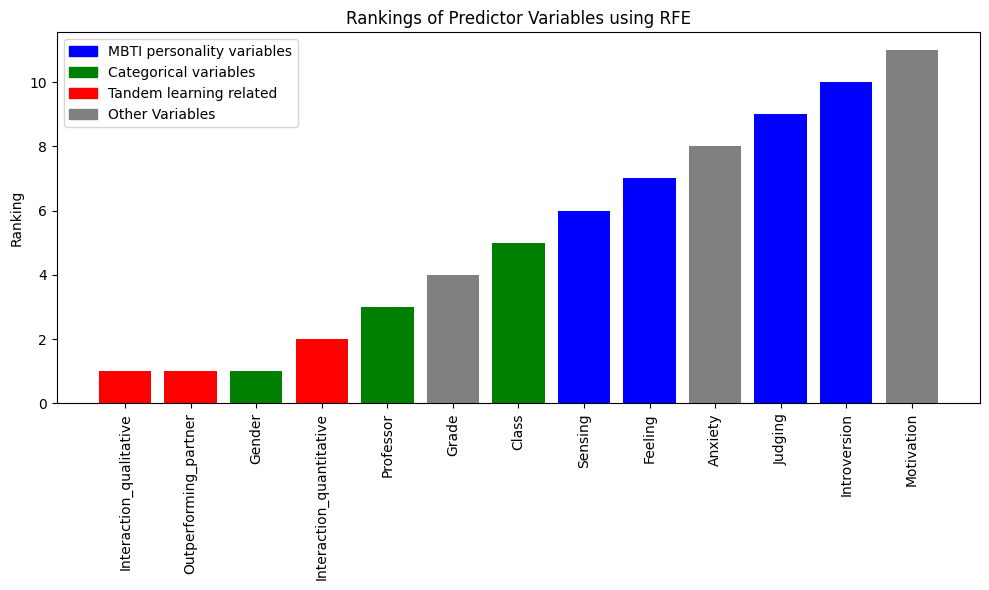

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X and y are defined

# Compute mutual information

# Define columns to highlight and their respective colors
highlight_cols1 = ['Introversion', 'Judging', 'Feeling', 'Sensing']
highlight_color1 = 'blue'  # Define color for first group of highlighted columns

highlight_cols2 = ['Class', 'Professor', 'Gender']
highlight_color2 = 'green'  # Define color for second group of highlighted columns

highlight_cols3 = ['Interaction_qualitative', 'Interaction_quantitative', "Outperforming_partner"]
highlight_color3 = 'red'  # Define color for second group of highlighted columns

# Plotting the bar chart with highlighted columns
highlight_colors = {col: highlight_color1 for col in highlight_cols1}
highlight_colors.update({col: highlight_color2 for col in highlight_cols2})
highlight_colors.update({col: highlight_color3 for col in highlight_cols3})

# Assuming selected_features_ranking is already computed as in your previous code
# Sort the features by their ranking
sorted_features = sorted(selected_features_ranking.items(), key=lambda x: x[1])

# Extract feature names and their rankings
features = [feat for feat, _ in sorted_features]
ranks = [rank for _, rank in sorted_features]

# Create a color list based on the previously defined highlight_colors
colors_for_ranks = [highlight_colors.get(col, 'gray') for col in features]

# Plotting the ranks of predictor variables with color based on the ranks
plt.figure(figsize=(10, 6))
bars = plt.bar(features, ranks, color=colors_for_ranks)  # Use plt.bar() for vertical bars
plt.ylabel('Ranking')  # Update ylabel to 'Ranking' for vertical bars
plt.title('Rankings of Predictor Variables using RFE')
#plt.gca().invert_xaxis()  # Invert x-axis for vertical bars
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Creating legend handles for the colors used
legend_patches = [
    plt.Rectangle((0, 0), 1, 1, color=color) for color in [highlight_color1, highlight_color2, highlight_color3, 'gray']
]

# Define legend labels
legend_labels = [
    'MBTI personality variables',
    'Categorical variables',
    'Tandem learning related',
    'Other Variables'
]

plt.legend(legend_patches, legend_labels)

plt.tight_layout()
plt.show()

In [36]:
df=data
list(df.columns)

['Successfulness',
 'Grade',
 'Interaction_quantitative',
 'Interaction_qualitative',
 'Outperforming_partner',
 'Class',
 'Professor',
 'Gender',
 'Motivation',
 'Anxiety',
 'Introversion',
 'Sensing',
 'Feeling',
 'Judging']

In [37]:
data = df
selected_columns = ['Successfulness',
 'Grade',
 'Interaction_quantitative',
 'Interaction_qualitative',
 'Outperforming_partner',
 'Motivation',
 'Anxiety',
 'Sensing',
 'Feeling',
 'Judging',
 'Introversion']
data = data[selected_columns]

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(method='minres')

# Fit the factor analysis model to your data
fa.fit(data)

# Calculate factor loadings
loadings = fa.loadings_

# Calculate error variances (unique variances)
# Error variance = 1 - (factor loading)^2
error_variances = 1 - np.square(loadings)

# Calculate McDonald's Omega
omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))

print("McDonald's Omega:")
print(omega)


McDonald's Omega:
0.5255314522938196


In [38]:
import pingouin as pg

data = df
selected_columns = ['Successfulness',
 'Grade',
 'Interaction_quantitative',
 'Interaction_qualitative',
 'Outperforming_partner',
 'Motivation',
 'Anxiety',
 'Sensing',
 'Feeling',
 'Judging',
 'Introversion']
data = data[selected_columns]

pg.cronbach_alpha(data=data)

(-0.6298758969959576, array([-1.182, -0.17 ]))

In [39]:
import pandas as pd
from scipy.stats import kendalltau

data = df

def gutman_lambda(df, columns):
    corr_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            corr, _ = kendalltau(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
    
    lambda_val = 1 - (1 / (len(columns) * (len(columns) - 1))) * sum([sum([corr_matrix.loc[col1, col2] for col2 in columns]) for col1 in columns])
    return lambda_val

# Example usage:
# Assuming 'df' is your pandas DataFrame and 'cols' is a list of columns containing categorical data
lambda_value = gutman_lambda(df, ["Class", "Gender", "Professor"])
print("Gutman's Lambda:", lambda_value)

Gutman's Lambda: 0.4462952410671488
